# Exam September 19, 2024

In [1]:
import sympy
import math
from IPython.display import display, Math
from robotic.manipulator import JointType, Manipulator
from robotic import scalar_repr_latex
from robotic.utils import draw_frame
from robotic.transformations import (
    Axis,
    AxisAngleSpec,
    EulerOrder,
    EulerSequence,
    EulerSpec,
    HomogeneousTransformation,
    Rotation,
    Translation,
    X,
    Y,
    Z,
)

# Excercise 1

First thing to note, is that a very similar example is discussed in [lecture 15](https://youtu.be/cNmp21y9HFI?t=4534&si=KSsVpLEfXqIYVcLh).
This seems in fact a standard robot.
While the first three joints are almost visible and understanble from the picture, the last three joints are somewhat hidden assume the image is embedded in the XY plane with x pointing right and y pointing up:

- a rotation along x
- a rotation along z
- a rotation along x

Even if not immidiately clear from the picture we have two offsets, one for going from frame 0 to frame 1 and the other from frame 2 to all the spherical wrist offsets.


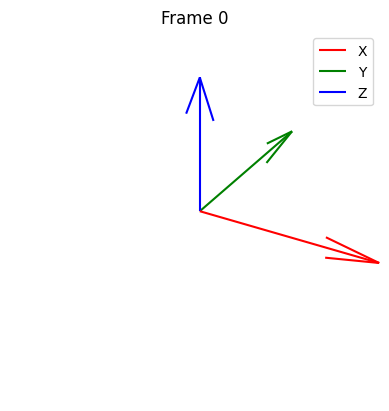

In [2]:
r_0 = Rotation.from_euler(((0,0,0), EulerSequence.XYZ,"MOVING"))
# Idiosincracy of matplotlib, this is actually the way matplotlib plots 3D space
frame_0 = draw_frame(r_0,label = "Frame 0", basis=Rotation.identity())

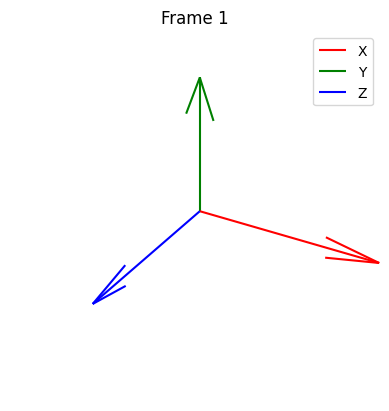

In [3]:
r_1 = Rotation.from_euler(((sympy.pi/2,0,0), EulerSequence.XYZ,"MOVING"))
frame_1 = draw_frame(r_1,label = "Frame 1",basis=frame_0)

The two frames have the same $z$ axis, however the condition for the direction of the $x$ axis is not met.
From the book, page 64:

> Choose the $x_i$ axis along the common normal to axes $z_{i-1}$ and $z_i$, with direction from Joint $i$ to Joint $i+1$

Which can be divided into two separate conditions:

1. Axis $x_i$ must lie along the common normal to axes $z_{i-1}$ and $z_i$
2. Axis $x_i$ must be directed from Joint $i$ to Joint $i+1$

To meet condition 1, we must have a rotation of $\pm \frac{\pi}{2}$, now, the only way to also satisfy condition 2 is to choose the positive rotation, so that $x_i$ points "upwards"

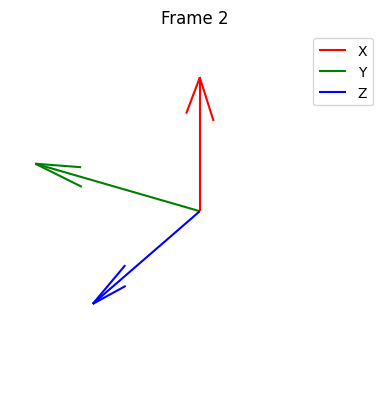

In [4]:
r_2 = Rotation.from_euler(((0,0,sympy.pi/2), EulerSequence.XYZ,"MOVING"))
frame_2 = draw_frame(r_2,label = "Frame 2",basis=frame_1)

In this case the common normal should point to the same direction of $x_2$.
This is because $z_3$ and $z_2$ intersect, and $x$ should pass along this point in a way that is normal to both $z_3$ and $z_2$.
In theory $x$ can either point upwards or downards.
Since $x_2$ already upward, choosing $x_3$ that points upward means no rotation along $z_{i-1}$, so there should be no offset along the DH parameter $\theta$, if other wise we decide to choose $x_3$ pointing downard, we should embed this information by a constant offset of $\pi$.
<div class="alert alert-block alert-warning">
<b>TODO:</b> Ask de Luca if this rationale is sound.
</div>

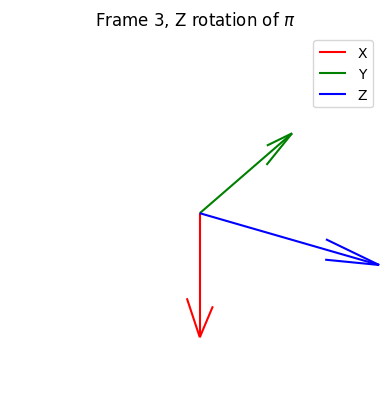

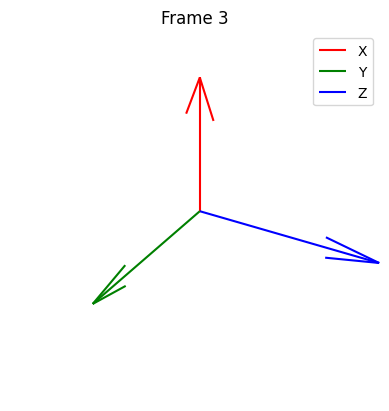

In [5]:
r_3 = Rotation.from_euler(((sympy.pi/2,0,sympy.pi), EulerSequence.XYZ,"MOVING"))
frame_3 = draw_frame(r_3,label = r"Frame 3, Z rotation of $\pi$", basis=frame_2)
r_3 = Rotation.from_euler(((sympy.pi/2,0,0), EulerSequence.XYZ,"MOVING"))
frame_3 = draw_frame(r_3,label = "Frame 3", basis=frame_2)

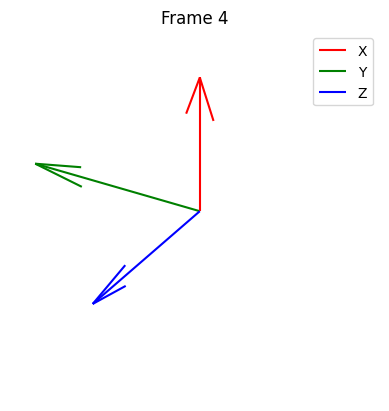

In [6]:
r_4 = Rotation.from_euler(((-sympy.pi/2,0,0), EulerSequence.XYZ,"MOVING"))
frame_4 = draw_frame(r_4,label = "Frame 4", basis=frame_3)

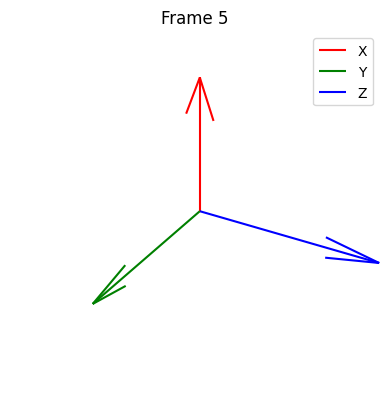

In [7]:
r_5 = Rotation.from_euler(((sympy.pi/2,0,0), EulerSequence.XYZ,"MOVING"))
frame_5 = draw_frame(r_5,label = "Frame 5", basis=frame_4)

Still not really clear what is the criterion for choosing the last frame.

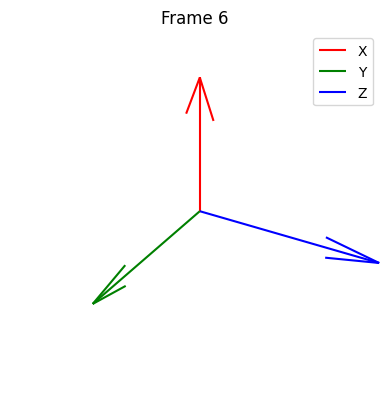

In [8]:
r_6 = Rotation.from_euler(((0,0,0), EulerSequence.XYZ,"MOVING"))
frame_6 = draw_frame(r_6,label = "Frame 6", basis=frame_5)

In [9]:
man = Manipulator.from_rotations([JointType.REVOLUTE]*6,[r_1,r_2,r_3,r_4,r_5,r_6])
man.dh_table()

WARNING | This method is still a WIP and might now work properly, double check.


   a \alpha  d      \theta      type
0  0   pi/2  0         q_1  REVOLUTE
1  0      0  0  q_2 + pi/2  REVOLUTE
2  0   pi/2  0         q_3  REVOLUTE
3  0  -pi/2  0         q_4  REVOLUTE
4  0   pi/2  0         q_5  REVOLUTE
5  0      0  0         q_6  REVOLUTE

<div class="alert alert-block alert-warning">
<b>TODO</b> 
</div>

Domanda sulle componenti translazionali, sul libro si parla di distanza tra due origini successive, quindi fa sembrare come se fosse una distanza euclidea.
Sulle slide c'e' un riferimento alla $x$ e alla positivita' e negativita' dell'offset che dipende da essa.
Se si parla di distanza euclidea capiscoperche' $a_2$ e' 650, ma non capisco come giustificchiamo quel $a_1= 100$.
Se altrimenti la distanza e' da assumersi sull'asse $x$, succede il contrario, capisco il significato di $a_1$ e di $a_2$.
L'unica cosa che mi viene in mente e' esprimere la distanza come la distanza del punto $O_{i-1}$ al punto $O_i$ nella direzione imposta da $x_i$

In [10]:
man = man.with_translational_offset([100,650, 0, 0,0,0],[430,0,0,700,0,88])
man.dh_table()

     a \alpha    d      \theta      type
0  100   pi/2  430         q_1  REVOLUTE
1  650      0    0  q_2 + pi/2  REVOLUTE
2    0   pi/2    0         q_3  REVOLUTE
3    0  -pi/2  700         q_4  REVOLUTE
4    0   pi/2    0         q_5  REVOLUTE
5    0      0   88         q_6  REVOLUTE

## Exercise 2

Explanation of geometric Jacobian can be found at [lecture 24](https://youtu.be/mmg-Eg9Qmeo?si=VoHDv6fandDb3BUC&t=100)

### A


<div class="alert alert-block alert-warning">
<b>TODO</b> 
</div>

Perche' dobbiamo togliere l'offset sul q per far venire i calcoli suoi ? 

In [11]:
r_2 = Rotation.from_euler(((0,0,0), EulerSequence.XYZ,"MOVING"))
man = Manipulator.from_rotations([JointType.REVOLUTE]*6,[r_1,r_2,r_3,r_4,r_5,r_6]).with_translational_offset([sympy.symbols("a_1"),sympy.symbols("a_2"), 0, 0,0,0],[sympy.symbols("d_1"),0,0,sympy.symbols("d_4"),0,sympy.symbols("d_6")])
man.dh_table()

WARNING | This method is still a WIP and might now work properly, double check.


     a \alpha    d \theta      type
0  a_1   pi/2  d_1    q_1  REVOLUTE
1  a_2      0    0    q_2  REVOLUTE
2    0   pi/2    0    q_3  REVOLUTE
3    0  -pi/2  d_4    q_4  REVOLUTE
4    0   pi/2    0    q_5  REVOLUTE
5    0      0  d_6    q_6  REVOLUTE

In [12]:
T_e = man.dh_matrix()
T_e

WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skip

Matrix([
[((sin(q_1)*sin(q_4) + cos(q_1)*cos(q_4)*cos(q_2 + q_3))*cos(q_5) - sin(q_5)*sin(q_2 + q_3)*cos(q_1))*cos(q_6) + (sin(q_1)*cos(q_4) - sin(q_4)*cos(q_1)*cos(q_2 + q_3))*sin(q_6), -((sin(q_1)*sin(q_4) + cos(q_1)*cos(q_4)*cos(q_2 + q_3))*cos(q_5) - sin(q_5)*sin(q_2 + q_3)*cos(q_1))*sin(q_6) + (sin(q_1)*cos(q_4) - sin(q_4)*cos(q_1)*cos(q_2 + q_3))*cos(q_6), (sin(q_1)*sin(q_4) + cos(q_1)*cos(q_4)*cos(q_2 + q_3))*sin(q_5) + sin(q_2 + q_3)*cos(q_1)*cos(q_5), d_6*((sin(q_1)*sin(q_4) + cos(q_1)*cos(q_4)*cos(q_2 + q_3))*sin(q_5) + sin(q_2 + q_3)*cos(q_1)*cos(q_5)) + (a_1 + a_2*cos(q_2) + d_4*sin(q_2 + q_3))*cos(q_1)],
[((sin(q_1)*cos(q_4)*cos(q_2 + q_3) - sin(q_4)*cos(q_1))*cos(q_5) - sin(q_1)*sin(q_5)*sin(q_2 + q_3))*cos(q_6) - (sin(q_1)*sin(q_4)*cos(q_2 + q_3) + cos(q_1)*cos(q_4))*sin(q_6), -((sin(q_1)*cos(q_4)*cos(q_2 + q_3) - sin(q_4)*cos(q_1))*cos(q_5) - sin(q_1)*sin(q_5)*sin(q_2 + q_3))*sin(q_6) - (sin(q_1)*sin(q_4)*cos(q_2 + q_3) + cos(q_1)*cos(q_4))*cos(q_6), (sin(q_1)*cos(q_4)*

We only care, for the position at least, about the first 3 joints.
 

In [92]:
p_p = HomogeneousTransformation.identity()
for t in man.frames()[:4]:
    p_p = sympy.simplify(p_p @ t)
p_p= HomogeneousTransformation(p_p).as_translation()
p_p

WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic


Matrix([
[(a_1 + a_2*cos(q_2) + d_4*sin(q_2 + q_3))*cos(q_1)],
[(a_1 + a_2*cos(q_2) + d_4*sin(q_2 + q_3))*sin(q_1)],
[           a_2*sin(q_2) + d_1 - d_4*cos(q_2 + q_3)]])


To check that we did everything correctly we can see that we can even extend up to joints 4 and 5.
This however have both center at P, and thus no additional translational offset is needed.

<div class="alert alert-block alert-warning">
<b>TODO</b> 
</div>

Perche' non e'cosi ?

<div class="alert alert-block alert-warning">
<b>TODO</b> 
</div>

Nelle sue lezioni, slide 17 del pacco di Slide 11 differential kinematics, dove parla dei contributi dei singoli joint, parlando del contributo del revolute joint, capisco a livello grafico e matematico cosa sta succedendom a non capisco se questa cosa avviene implicitamente in questo modo di fare o il risultato viene solo per un caso, o se capisco bene e' incluso implicitamente dentro la matrice di DH ?
Non riesco a capire perche' non ha la struttura che abbiamo definito nella pagina 35 di Differential kinematics dove J e' una matrice a blocchi

$$
J = 
\begin{bmatrix}
J_{11} & 0 \\
J_{12} & J_{22} \\ 
\end{bmatrix}
$$

Cercare di capire cosa sbaglio nella geometric jacobian

In [ ]:
# v  = sympy.Matrix(man.geometric_jacobian()[:3,:])
# v = v.subs("d_6",0)
# sympy.simplify(v @ sympy.Matrix([1] * 6) )
# v = v.jacobian([sympy.symbols("q_1"),sympy.symbols("q_2"),sympy.symbols("q_3")]).subs()

WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic


ShapeError: Matrix size mismatch: (3, 6) * (3, 1).

In [ ]:
# p_p = HomogeneousTransformation.identity()
# for t in man.frames()[:6]:
#     p_p = sympy.simplify(p_p @ t)
# p_p= HomogeneousTransformation(p_p).as_translation()
# p_p

v  = sympy.Matrix(man.geometric_jacobian(evaluation_frame=4)[:3,:])#.jacobian([sympy.symbols("q_1"),sympy.symbols("q_2"),sympy.symbols("q_3")])
(v @ sympy.Matrix([1,1,1,1])).jacobian([sympy.symbols("q_1"),sympy.symbols("q_2"),sympy.symbols("q_3")])

In [15]:
j_l = p_p.jacobian(sympy.Matrix([sympy.symbols("q_1"),sympy.symbols("q_2"),sympy.symbols("q_3")]).T)
j_l

Matrix([
[-(a_1 + a_2*cos(q_2) + d_4*sin(q_2 + q_3))*sin(q_1), (-a_2*sin(q_2) + d_4*cos(q_2 + q_3))*cos(q_1), d_4*cos(q_1)*cos(q_2 + q_3)],
[ (a_1 + a_2*cos(q_2) + d_4*sin(q_2 + q_3))*cos(q_1), (-a_2*sin(q_2) + d_4*cos(q_2 + q_3))*sin(q_1), d_4*sin(q_1)*cos(q_2 + q_3)],
[                                                  0,             a_2*cos(q_2) + d_4*sin(q_2 + q_3),          d_4*sin(q_2 + q_3)]])

In [52]:
j_l_numerical = sympy.simplify(p_p.jacobian([sympy.symbols("q_1"),sympy.symbols("q_2"),sympy.symbols("q_3")])).subs({
    "a_1": 100 * 0.001,
    "a_2": 650 * 0.001,
    "d_4": 700 * 0.001,
    "q_1" : 0,
    "q_2" : sympy.pi/2,
    "q_3" : 0,
}).evalf()
j_l_numerical

Matrix([
[  0, -0.65,   0],
[0.8,     0,   0],
[  0,   0.7, 0.7]])

In [55]:
j_l_numerical @ sympy.Matrix([
    sympy.rad(250),
    sympy.rad(250),
    sympy.rad(215),
]).evalf()

Matrix([
[-2.83616003449079],
[ 3.49065850398866],
[ 5.68104671524154]])

### B

In [32]:
man.frames()[1].as_rotation()

WARNING | Skipping numeric validation: matrix is symbolic


Matrix([
[cos(q_2), -sin(q_2), 0],
[sin(q_2),  cos(q_2), 0],
[       0,         0, 1]])

In [70]:
z_0 = Z
display(Math("z_0 = " + f"{z_0}"))
z_1:Axis =man.frames()[0].as_rotation()  @ z_0
display(Math("z_1 = " + f"{z_1}"))
...
# z_2 = man.frames()[0].as_rotation() @ man.frames()[1].as_rotation() @ z_0
# display(Math("z_2 = " + f"{z_2}"))
# z_3 = (man.frames()[2].as_rotation() @ z_2).simplify()
# display(Math("z_3 = " + f"{z_3}"))
# z_4 = man.frames()[0].as_rotation() @ z_0
# display(Math("z_4 = " + f"{z_4}"))
# z_5 = (man.frames()[1].as_rotation() @ z_1).simplify()
# display(Math("z_5 = " + f"{z_5}"))

<IPython.core.display.Math object>

WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic


<IPython.core.display.Math object>

Ellipsis

Or equivalently

In [ ]:
omega = sympy.Matrix(man.geometric_jacobian()[3:,:])
omega_numerical = omega.subs({
    "a_1": 100 * 0.001,
    "a_2": 650 * 0.001,
    "d_4": 700 * 0.001,
    "q_1" : 0,
    "q_2" : sympy.pi/2,
    "q_3" : 0,
    "q_4" : 0,
    "q_5" : 0,
}).evalf()
omega_numerical 

WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic
WARNING | Skipping numeric validation: matrix is symbolic
WARNING | Skipping normalization: vector is symbolic


Matrix([
[  0,    0,    0, 1.0,    0, 1.0],
[  0, -1.0, -1.0,   0, -1.0,   0],
[1.0,    0,    0,   0,    0,   0]])

In [86]:
omega_a_numerical = omega_numerical[:,:3]
omega_a_numerical @sympy.Matrix([
    sympy.rad(250),
    sympy.rad(250),
    sympy.rad(215),
]).evalf()


Matrix([
[                0],
[-8.11578102177363],
[ 4.36332312998582]])

## C

In [87]:
omega_b_numerical = omega_numerical[:,3:]
omega_b_numerical @  sympy.Matrix([
    sympy.rad(365),
    sympy.rad(380),
    sympy.rad(700),
]).evalf()


Matrix([
[ 18.5877565337396],
[-6.63225115757845],
[                0]])

## Excercise 3